<a href="https://colab.research.google.com/github/rikanga/Easy-Numpy/blob/main/04_representing_data_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# %matplotlib inline
# from preamble import *
import numpy as np, pandas as pd, matplotlib.pyplot as plt
!pip install mglearn
import mglearn

     |████████████████████████████████| 540 kB 27.3 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=5bb5ebff63cbb46227b2ec9371688a16691b81d72c7f1fcb18b16058851abdec
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


## Representing Data and Engineering Features

### Categorical Variables

\begin{align*}
\end{align*}

#### One-Hot-Encoding (Dummy variables)

In [2]:
import os
# The file has no headers naming the columns, so we pass header=None
# and provide the column names explicitly in "names"
adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")

data = pd.read_csv(
    adult_path, header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
# For illustration purposes, we only select some of the columns
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
# IPython.display allows nice output formatting within the Jupyter notebook
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [3]:
mglearn.datasets.DATA_PATH

'/usr/local/lib/python3.7/dist-packages/mglearn/data'

##### Checking string-encoded categorical data

In [4]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [5]:
print("Original features:\n", list(data.columns), "\n")


data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

In [6]:
display(data_dummies.head())

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [7]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']

In [8]:
features.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,38,40,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,53,40,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [9]:
data_dummies['income_ >50K'].value_counts()

0    24720
1     7841
Name: income_ >50K, dtype: int64

In [10]:
X = features.values

In [11]:
y = data_dummies['income_ >50K']

In [12]:
print("X shape", X.shape)
print("y shape", y.shape)

X shape (32561, 44)
y shape (32561,)


In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [16]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [17]:
print("Test score ", logreg.score(X_test, y_test))

Test score  0.8067804937968308


#### Numbers Can Encode Categoricals

In [18]:
# create a DataFrame with an integer feature and a categorical string feature
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
                        'Categorical Feature': ['socks', 'fox', 'socks', 'box']})

display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [19]:
display(pd.get_dummies(demo_df))

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [20]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)

display(pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature']))

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


### OneHotEncoder and ColumnTransformer: Categorical Variables with scikit-learn

In [21]:
from sklearn.preprocessing import OneHotEncoder

# Setting sparse=False means OneHotEncode will return a numpy array, not a sparse matrix
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0.]]


In [22]:
ohe = OneHotEncoder()
print(ohe.fit_transform(demo_df))

  (0, 0)	1.0
  (0, 5)	1.0
  (1, 1)	1.0
  (1, 4)	1.0
  (2, 2)	1.0
  (2, 5)	1.0
  (3, 1)	1.0
  (3, 3)	1.0


In [23]:
print(ohe.get_feature_names())

['x0_0' 'x0_1' 'x0_2' 'x1_box' 'x1_fox' 'x1_socks']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [24]:
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['age', 'hours-per-week']),
     ("onehot", OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'])])

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# get all columns apart from income for the features
data_features = data.drop("income", axis=1)
# split dataframe and income
X_train, X_test, y_train, y_test = train_test_split(
    data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


In [27]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("Test score: {:.2f}".format(logreg.score(X_test_trans, y_test)))

Test score: 0.81


In [28]:
ct.named_transformers_.onehot

OneHotEncoder(sparse=False)

#### Convenient ColumnTransformer creation with ``make_columntransformer``

In [29]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
    (['age', 'hours-per-week'], StandardScaler()),
    (['workclass', 'education', 'gender', 'occupation'], OneHotEncoder(sparse=False)))

### Binning, Discretization, Linear Models, and Trees

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [31]:
X, y = mglearn.datasets.make_wave(n_samples=100)

In [32]:
line = np.linspace(-3, 3,1000, endpoint=False).reshape(-1, 1)

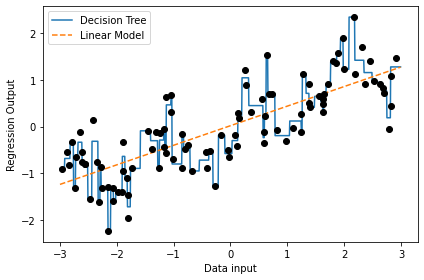

In [33]:
tree = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, tree.predict(line), label="Decision Tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line),'--', label='Linear Model')

plt.plot(X[:, 0], y, 'ok')
plt.xlabel("Data input")
plt.ylabel("Regression Output")
plt.legend(loc='best')
plt.tight_layout()

La meilleure façon pour construire un **modèle linéaire** puissant c'est d'utiliser la **discrétisation** des données

In [34]:
bins = np.linspace(-3, 3, 11)

In [35]:
bins

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

On trouve l'emplacement de chaque point de **line** dans le groupe **bins**
grâce la fonction **np.digitize**

In [36]:
which_bin = np.digitize(X, bins=bins)

In [37]:
X[:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

In [38]:
which_bin[:5]

array([[ 4],
       [10],
       [ 8],
       [ 6],
       [ 2]])

On a là ci-haut, l'emplacement de chaque point dans les intervalles **bins**

In [39]:
from sklearn.preprocessing import OneHotEncoder

In [40]:
encoder = OneHotEncoder(sparse=False)

In [41]:
encoder.fit(which_bin, y)

OneHotEncoder(sparse=False)

In [42]:
X_binned = encoder.transform(which_bin)

In [43]:
X_binned[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [44]:
X_binned.shape, X.shape

((100, 10), (100, 1))

In [45]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

In [46]:
log = LinearRegression().fit(X_binned, y)

In [47]:
tree = DecisionTreeRegressor(min_samples_split=3)

In [48]:
tree.fit(X_binned, y)
log.fit(X_binned, y)

LinearRegression()

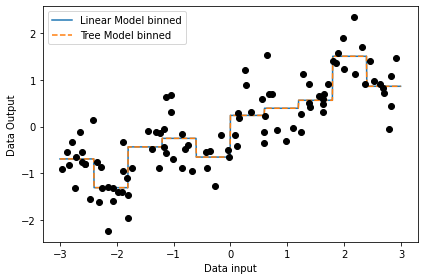

In [49]:
plt.plot(line, log.predict(line_binned), label='Linear Model binned')
plt.plot(line, tree.predict(line_binned), '--', label="Tree Model binned")
plt.plot(X[:, 0], y, 'ok')
plt.xlabel('Data input')
plt.ylabel("Data Output")
plt.legend(loc='best')
plt.tight_layout()

In [50]:
# To test the endesting of the leson
x_binned = np.digitize(X, bins=bins)
encode = OneHotEncoder(sparse=False).fit(x_binned)
x_bin_trans = encode.transform(x_binned)

In [51]:
x_bin_trans.shape

(100, 10)

### Interactions and Polynomials

In [52]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


In [53]:
lin = LinearRegression().fit(X_combined, y)

In [54]:
line_combined = np.hstack([line, line_binned])
line_combined.shape

(1000, 11)

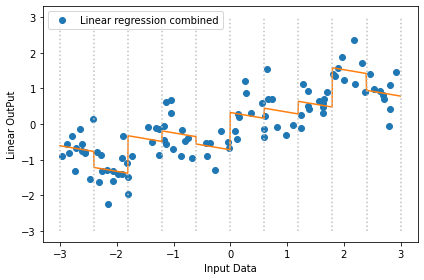

In [55]:
plt.plot(X_combined[:, 0], y, 'o', label='Linear regression combined')
plt.plot(line, lin.predict(line_combined))

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='silver')

plt.xlabel('Input Data')
plt.ylabel("Linear OutPut")
plt.legend(loc=2)
plt.tight_layout()

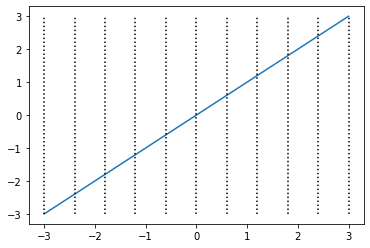

In [56]:
plt.plot([-3, 3], [-3, 3])
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':k')

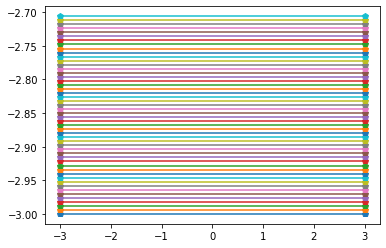

In [57]:
for l in line[:50]:
    plt.plot([-3, 3], [l, l], '-p')

In [58]:
np.hstack([X_binned, X*X_binned]).shape

(100, 20)

In [59]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


In [60]:
lin = LinearRegression().fit(X_product, y)

In [61]:
line_product = np.hstack([line_binned, line * line_binned])

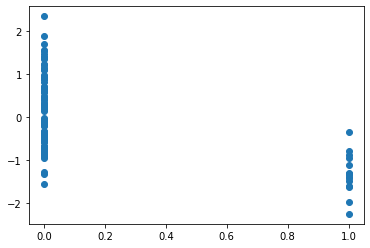

In [62]:
plt.plot(X_product[:, 1], y, 'o')

In [63]:
reg = LinearRegression().fit(X_product, y)

In [64]:
line_product = np.hstack([line_binned, line * line_binned])

In [65]:
line_product.shape, X_product.shape

((1000, 20), (100, 20))

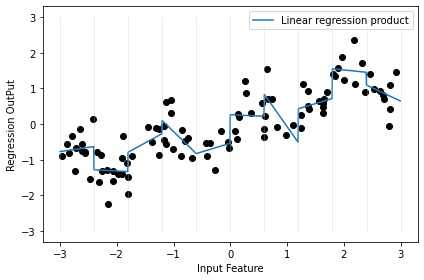

In [66]:
plt.plot(X[:, 0], y, 'ok')
plt.plot(line, reg.predict(line_product), label='Linear regression product')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], '-', c='silver', linewidth=1, alpha=.3)
plt.xlabel('Input Feature')
plt.ylabel("Regression OutPut")
plt.legend()
plt.tight_layout()

In [67]:
#reg = LinearRegression().fit(X_product, y)

#line_product = np.hstack([line_binned, line * line_binned])
#plt.plot(line, reg.predict(line_product), label='linear regression product')

#plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)

#plt.plot(X[:, 0], y, 'o', c='k')
#plt.ylabel("Regression output")
#plt.xlabel("Input feature")
#plt.legend(loc="best")

### Using the polynomial Feature

In [68]:
from sklearn.preprocessing import PolynomialFeatures

In [69]:
poly = PolynomialFeatures(degree=10, include_bias=False)

In [70]:
poly.fit(X)

PolynomialFeatures(degree=10, include_bias=False)

In [71]:
PolynomialFeatures?

In [72]:
X_poly = poly.transform(X)

In [73]:
print("Polynomial Feature", poly.get_feature_names())

Polynomial Feature ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [74]:
X[:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

In [75]:
X_poly[:5]

array([[-7.52759287e-01,  5.66646544e-01, -4.26548448e-01,
         3.21088306e-01, -2.41702204e-01,  1.81943579e-01,
        -1.36959719e-01,  1.03097700e-01, -7.76077513e-02,
         5.84199555e-02],
       [ 2.70428584e+00,  7.31316190e+00,  1.97768801e+01,
         5.34823369e+01,  1.44631526e+02,  3.91124988e+02,
         1.05771377e+03,  2.86036036e+03,  7.73523202e+03,
         2.09182784e+04],
       [ 1.39196365e+00,  1.93756281e+00,  2.69701700e+00,
         3.75414962e+00,  5.22563982e+00,  7.27390068e+00,
         1.01250053e+01,  1.40936394e+01,  1.96178338e+01,
         2.73073115e+01],
       [ 5.91950905e-01,  3.50405874e-01,  2.07423074e-01,
         1.22784277e-01,  7.26822637e-02,  4.30243318e-02,
         2.54682921e-02,  1.50759786e-02,  8.92423917e-03,
         5.28271146e-03],
       [-2.06388816e+00,  4.25963433e+00, -8.79140884e+00,
         1.81444846e+01, -3.74481869e+01,  7.72888694e+01,
        -1.59515582e+02,  3.29222321e+02, -6.79478050e+02,
         1.

In [76]:
reg = LinearRegression().fit(X_poly, y)

In [77]:
line_poly = poly.transform(line)

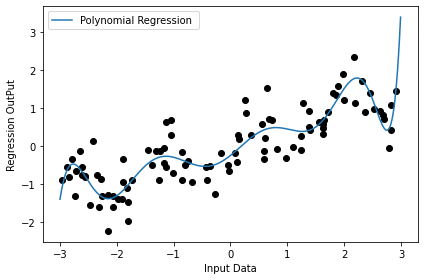

In [78]:

plt.plot(X[:, 0], y, 'ok')
plt.plot(line, reg.predict(line_poly), label='Polynomial Regression ')
plt.xlabel("Input Data")
plt.ylabel("Regression OutPut")
plt.legend()
plt.tight_layout()

In [79]:
from sklearn.svm import SVR

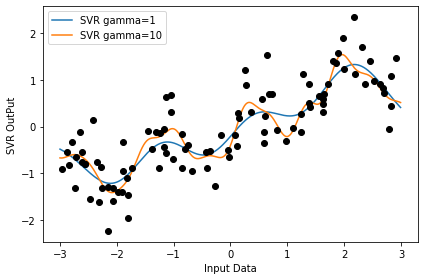

In [80]:
for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label=f"SVR gamma={gamma}")
plt.plot(X[:, 0], y, 'ok')
plt.xlabel('Input Data')
plt.ylabel("SVR OutPut")
plt.legend()
plt.tight_layout()

In [81]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [82]:
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [83]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,
                                                    random_state=0)

In [84]:
scaler = MinMaxScaler()

In [85]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [86]:
poly = PolynomialFeatures(degree=2)

In [87]:
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.fit_transform(X_test_scaled)

In [88]:
print("X_train.shape", X_train.shape)
print("X_train_poly.shape", X_train_poly.shape)

X_train.shape (379, 13)
X_train_poly.shape (379, 105)


In [89]:
print(poly.get_feature_names())

['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Comparing the score usign **Ridge**

In [90]:
from sklearn.linear_model import Ridge

In [91]:
# ridge without iteration
ridge = Ridge().fit(X_train_scaled, y_train)

#ridge with iteration
ridge_poly = Ridge().fit(X_train_poly, y_train)

In [92]:
print("Ridge train score without interations", ridge.score(X_train_scaled, y_train))
print("Ridge train score with iterations", ridge_poly.score(X_train_poly, y_train))

Ridge train score without interations 0.7656443349364728
Ridge train score with iterations 0.8865631765824034


### Comparing with **RandomForestRegressor**

In [93]:
from sklearn.ensemble import RandomForestRegressor

In [94]:
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("RandomForest without iterations", rf.score(X_train_scaled, y_train))

rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("RandomForest with iterations", rf.score(X_train_poly, y_train))

RandomForest without iterations 0.9821526330903588
RandomForest with iterations 0.9856463340195134


### Univariate Nonlinear Transformations

In [95]:
rng = np.random.RandomState(0)

In [96]:
X_org = rng.normal(size=(1000, 3))

In [97]:
w = rng.normal(size=(3))

In [98]:
X = rng.poisson(10 * np.exp(X_org))

In [99]:
y = np.dot(X_org, w)

In [100]:
X[:20]

array([[ 56,  18,  27],
       [ 81,  57,   3],
       [ 25,   9,  11],
       [ 20,  13,  30],
       [ 27,  13,  13],
       [ 18,  46,   7],
       [ 12,   3,   1],
       [ 21,  20,   2],
       [109,   1,   6],
       [  7,  55,  41],
       [ 15,   5,   6],
       [  1,   6,  15],
       [ 27,  46,   6],
       [  4,   1,   0],
       [  1,  67,   4],
       [  7,   1,  23],
       [  2,  15,   4],
       [ 11,   4,   2],
       [  6,  20,   8],
       [ 18,   8,   9]])

In [101]:
print("Number of features appearances ", np.bincount(X[:, 0]))

Number of features appearances  [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Let visualize the appearance of values in the first features

In [102]:
bins = np.bincount(X[:, 0])

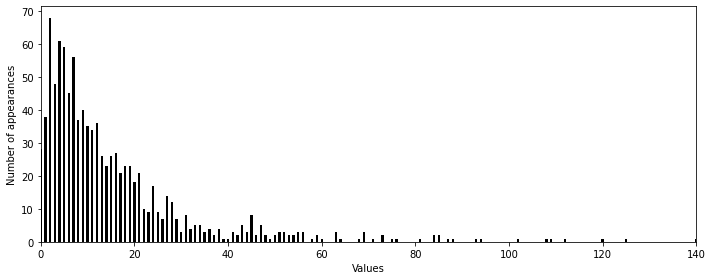

In [103]:
plt.figure(figsize=(10, 4))
plt.bar(range(len(bins)), bins, color='k', width=.5)
plt.xlabel("Values")
plt.ylabel("Number of appearances")
plt.xlim((0, 140))
plt.tight_layout()

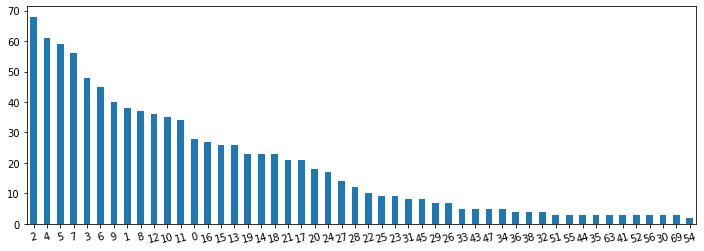

In [104]:
pd.value_counts(X[:, 0])[:50].plot.bar(rot=15, figsize=(12, 4))

NB: ce genre de distribution est bien comprise par le modèle linéaire

In [105]:
ridge = Ridge()

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [107]:
ridge.fit(X_train, y_train)

Ridge()

In [108]:
print("Ridge test score", ridge.score(X_test, y_test))

Ridge test score 0.6224186236310756


**Let applying the logarithm transformation**

In [109]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

(array([19.,  0.,  0.,  0.,  0.,  0.,  0., 31.,  0.,  0., 56.,  0., 37.,
        41., 44., 30., 97., 51., 87., 88., 71., 37., 35., 14., 12.]),
 array([0.        , 0.07028528, 0.14057055, 0.21085583, 0.2811411 ,
        0.35142638, 0.42171165, 0.49199693, 0.5622822 , 0.63256748,
        0.70285275, 0.77313803, 0.84342331, 0.91370858, 0.98399386,
        1.05427913, 1.12456441, 1.19484968, 1.26513496, 1.33542023,
        1.40570551, 1.47599078, 1.54627606, 1.61656134, 1.68684661,
        1.75713189]),
 <a list of 25 Patch objects>)

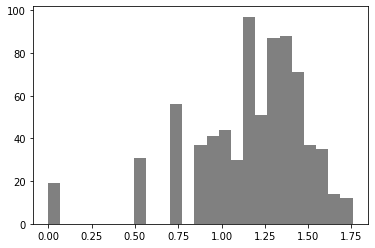

In [110]:
plt.hist(np.log(X_train_log[:, 0] + 1), bins=25, color='gray')

In [111]:
ridge = Ridge()
ridge.fit(X_train_log, y_train)
score = ridge.score(X_test_log, y_test)

In [112]:
print("Ridge Test score {:.2f}".format(score))

Ridge Test score 0.87


## Automatic Feature Selection

Il est parfois important de reduire la dimension du dataset pour
pour permettre au modèle de bien généraliser.

Pour savoir quelles sont les variables qui sont importantes pour la selection
et implémentation du modèle il y'a trois techniques:

* **Univariate statistics**
* **model-based selection**
* **Iteractive selection**

Toutes ces techniques sont de modèles supervisé donc doivent avoir **y** pour leurs entrainement

### Univariate statistics

Avec cette technique, on calcule si il y'a statistiquement une relation entre chaque variables et sa cible ou sa prédiction.

La variable ayant une grande confiance, est sélectionnée.

En classification, ceci est aussi appelé **ANOVA(analysis of variance)**

Cette technique est univariée ce qui veut dire qu'elle considère chaque variable individuellement.

Ils sont très rapides à implémenter et indépendant du modèle à implémenter

on a dexu sélecteurs de variables:
* **SelectKB** qui sélectionne un nombre k de fonctionnalités définies et
* **SelectPercentile** qui sélectionne un pourcent finit de caractériques

In [113]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile

In [114]:
cancer = load_breast_cancer()

In [115]:
rng = np.random.RandomState(0)

In [116]:
noise = rng.normal(size=(len(cancer.data), 50))

In [117]:
X_w_noise = np.hstack([cancer.data, noise])

In [118]:
X_w_noise.shape

(569, 80)

In [119]:
n = np.random.normal(size=(10, 4))
v = np.random.normal(size=(10, 5))

In [120]:
np.hstack([n, v]).shape

(10, 9)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X_w_noise,
                                                    cancer.target, random_state=0, test_size=.5)

In [122]:
X_train.shape, X_test.shape

((284, 80), (285, 80))

In [123]:
select = SelectPercentile(percentile=50)

In [124]:
select.fit(X_train, y_train)

SelectPercentile(percentile=50)

In [125]:
X_train_selected = select.transform(X_train)

In [126]:
X_train.shape,  X_train_selected.shape

((284, 80), (284, 40))

In [127]:
cancer.data.shape

(569, 30)

On peut voir les caractéristiques sélectionnées grâce à la methode **get_support**

In [128]:
mask = select.get_support()

In [129]:
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False,  True,  True,
       False, False,  True, False,  True,  True, False, False, False,
       False,  True, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False])

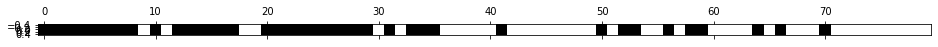

In [130]:
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [131]:
mask[:11]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True])

Let compare using the LogisticRegression model

In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
X_test_selected = select.transform(X_test)

In [134]:
lr  = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
print("Test score all with features", lr.score(X_test, y_test))

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train_selected, y_train)
print("Test score with only selected features", lr.score(X_test_selected, y_test))

Test score all with features 0.9403508771929825
Test score with only selected features 0.9368421052631579


On se rend compte que nous avons les mêmes performances dans les deux modèles. Ceci signifie que les variables non importantes(bruits ou noise) ont été certe supprimer dans le dataset grâce à **SelectPercentile** et sommes restés avec les caractéristiques utiles

### Model-based feature selection

Cette technique utilise les modèles supervisés pour juger l'importances de variables et ne garder quelques variables importantes.

Pour faire la sélection avec ce modèle, nous devons import la classe **SelectFromModel** dans le sous module **feature_selection**. Le sélecteur prend en paramètre, le modèle sur lequel sélectionner et le seuil(**threshold**) de sélection

Pour le choix de sélection, le modèle se base aussi sur:
* **feature_importances_** dans les arbdres de decision
* **Au coéfficients** dans les modèles linéaires

In [135]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [136]:
#Initialisation du sélecteur
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold='median'
)

Ce selecteur prendre toute les variables dont l'importance de leurs caractéristiques est supérieur à la moyenne.

In [137]:
select.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                threshold='median')

In [138]:
X_train_l1 = select.transform(X_train)

In [139]:
print("X_train.shape", X_train.shape)
print("X_train_l1.shape", X_train_l1.shape)

X_train.shape (284, 80)
X_train_l1.shape (284, 40)


In [140]:
select.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True, False, False, False,
       False, False,  True, False,  True,  True,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
        True, False, False, False, False, False, False,  True])

In [141]:
support = select.get_support()

Text(0.5, 1.05, 'The feature Selected')

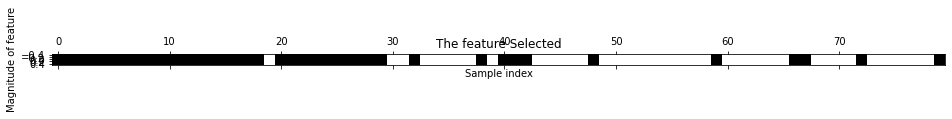

In [142]:
plt.matshow(support.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.ylabel("Magnitude of feature")
plt.title("The feature Selected")

In [143]:
X_test_l1 = select.transform(X_test)

In [144]:
score = LogisticRegression(max_iter=10000).fit(X_train_l1, y_train).score(X_test_l1, y_test)

In [145]:
print("Test score with only features selected", score)

Test score with only features selected 0.9403508771929825


### Iterative Feature Selection

Avec cette technique, une série des modèles est construits avec des caractéristiques différentes.

Pour y arriver il y'a deux methodes:

* Commencer sans caractéristiques et ajouter une à une jusqu'à ce que les critères soient atteints ou
* Commencer avec toutes les caractéristiques et supprimer une à une jusqu'à ce que les critères sont remplis

Nous allons utilisé **RFE(Recursive Feature Elimination)** qui commence avec:
* avec toutes les caractéristiques,
* construit les modèles et
* écarte les caractéristiques les moins importantes

On trouve le sélecteur **RFE** toujours dans la **feature_selection** de sklearn

In [146]:
from sklearn.feature_selection import RFE

In [147]:
select = RFE(
    RandomForestClassifier(n_estimators=100, random_state=42),
    n_features_to_select=40
)

In [149]:
select.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=40)

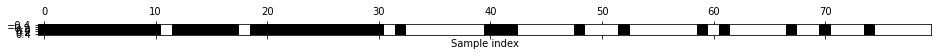

In [150]:
# visualize the features selected
mask = select.get_support()

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.show()

In [151]:
X_test_rfe = select.transform(X_test)
X_train_rfe = select.transform(X_train)

In [152]:
score = LogisticRegression(max_iter=10000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)

In [153]:
print("Score after selection", score)

Score after selection 0.9438596491228071


In [154]:
# On peut directement tester la précision avec le modèle à l'intérieur du sélecteur
select.score(X_test, y_test)

0.9543859649122807

### Utilizing expert Knowledge

In [155]:
citibike = mglearn.datasets.load_citibike()

In [156]:
citibike.head()

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64

In [161]:
xticks = pd.date_range(start=citibike.index.min(),
                       end=citibike.index.max(), freq="D")

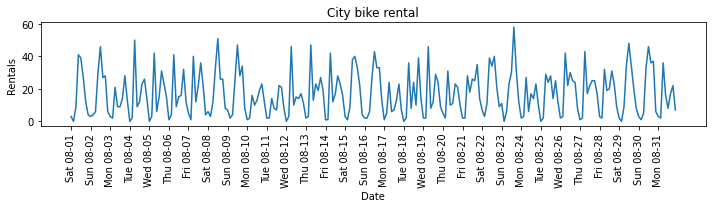

In [177]:
plt.figure(figsize=(10, 3))

#citibike.plot()
plt.plot(citibike)
plt.xticks(xticks, labels=xticks.strftime('%a %m-%d'), rotation=90)
plt.title("City bike rental")
plt.xlabel("Date")
plt.ylabel("Rentals")
plt.tight_layout()

In [179]:
xticks.size

31

In [183]:
citibike.index.strftime('%s').astype('int')

Int64Index([1438387200, 1438398000, 1438408800, 1438419600, 1438430400,
            1438441200, 1438452000, 1438462800, 1438473600, 1438484400,
            ...
            1440957600, 1440968400, 1440979200, 1440990000, 1441000800,
            1441011600, 1441022400, 1441033200, 1441044000, 1441054800],
           dtype='int64', name='starttime', length=248)

In [186]:
# extract the target values (number of rentals)
y = citibike.values

# convert the time to POSIX time using the "%s"
X = citibike.index.strftime('%s').astype('int').values.reshape(-1, 1)

In [189]:
X.shape, y.shape

((248, 1), (248,))

**function evalutatecthe features***

In [207]:
from sklearn.ensemble import RandomForestRegressor

In [208]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)

In [228]:
n_train=184
def eval_on_features(features, target, regressor):
  # split the given features into a training and a test set
  X_train, X_test = features[:n_train], features[n_train:]
  print("X_train.shape", X_train.shape)
  print("X_test.shape", X_test.shape)

  # also split the target array
  y_train, y_test = target[:n_train], target[n_train:]
  regressor.fit(X_train, y_train)
  print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))

  y_pred = regressor.predict(X_test)
  y_pred_train = regressor.predict(X_train)

  plt.figure(figsize=(10, 3))
  plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90,
  ha="left")

  plt.plot(range(n_train), y_train, label="train")
  plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
  plt.plot(range(n_train), y_pred_train, '--', label="prediction train")
  plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
  label="prediction test")
  plt.legend(loc=(1.01, 0))
  plt.xlabel("Date")
  plt.ylabel("Rentals")

X_train.shape (184, 1)
X_test.shape (64, 1)
Test-set R^2: -0.04


<Figure size 432x288 with 0 Axes>

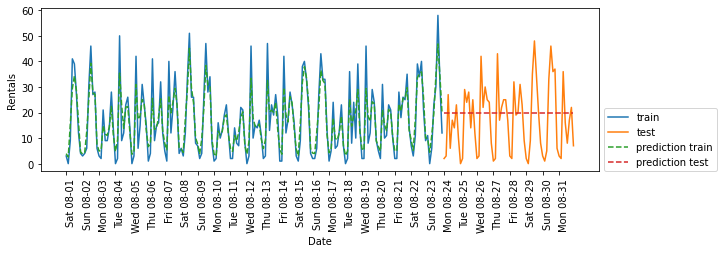

In [229]:
plt.figure()
eval_on_features(X, y, regressor)

In [230]:
citibike.index.minute

Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            ...
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', name='starttime', length=248)

In [231]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
X_hour.shape

(248, 1)

X_train.shape (184, 1)
X_test.shape (64, 1)
Test-set R^2: 0.60


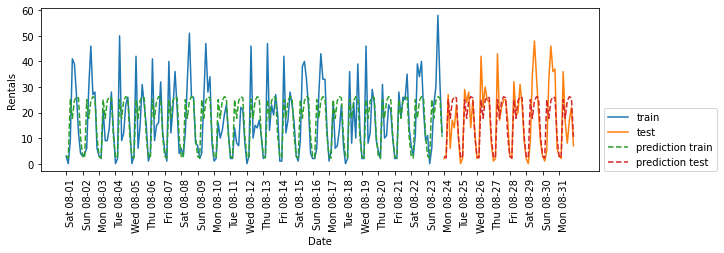

In [232]:
eval_on_features(X_hour, y, regressor)

In [235]:
#Let add also the day of the week
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                         citibike.index.hour.values.reshape(-1, 1)])

X_train.shape (184, 2)
X_test.shape (64, 2)
Test-set R^2: 0.84


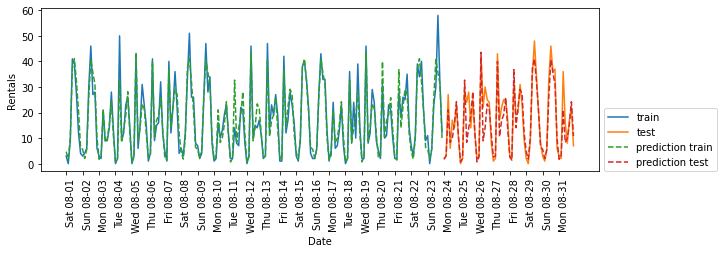

In [237]:
eval_on_features(X_hour_week, y, regressor)

X_train.shape (184, 2)
X_test.shape (64, 2)
Test-set R^2: 0.13


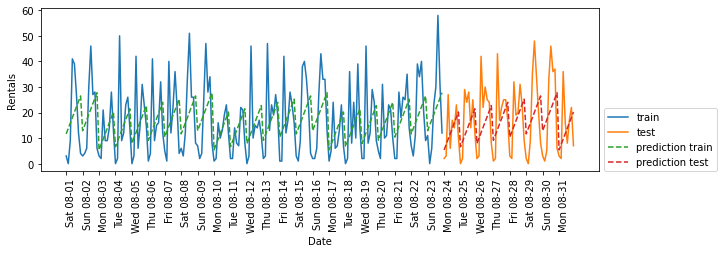

In [238]:
#Let try to use the simple linear model
from sklearn.linear_model import LinearRegression

eval_on_features(X_hour_week, y, LinearRegression())

In [239]:
X_hour_week.shape

(248, 2)

In [240]:
from sklearn.preprocessing import OneHotEncoder

In [241]:
enc = OneHotEncoder()

In [242]:
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

In [243]:
X_hour_week_onehot.shape

(248, 15)

In [245]:
X_hour_week_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

X_train.shape (184, 15)
X_test.shape (64, 15)
Test-set R^2: 0.62


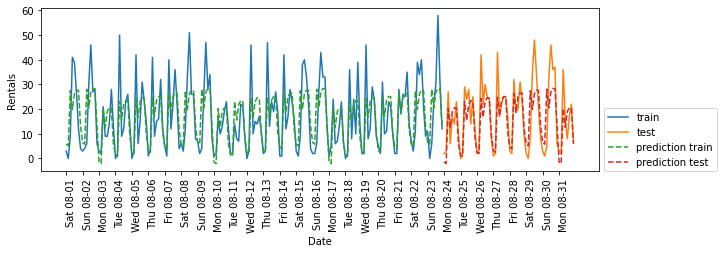

In [247]:
from sklearn.linear_model import Ridge

eval_on_features(X_hour_week_onehot, y, Ridge())

In [248]:
from sklearn.preprocessing import PolynomialFeatures

In [251]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)

In [252]:
X_hour_week_one_hot_poly = poly_transformer.fit_transform(X_hour_week_onehot)

X_train.shape (184, 120)
X_test.shape (64, 120)
Test-set R^2: 0.85


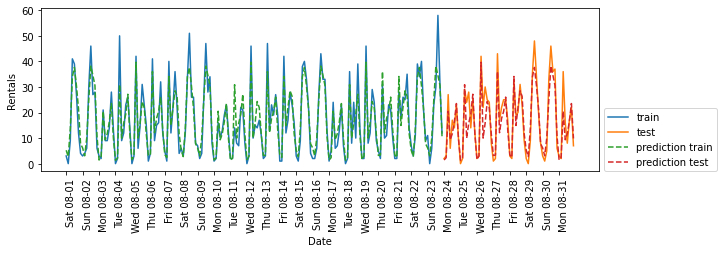

In [253]:
ridge = Ridge()

eval_on_features(X_hour_week_one_hot_poly, y, ridge)

In [257]:
hour = ['%02d:00' % i for i in range(0, 24, 3)]
day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [258]:
features = day + hour
features

['Mon',
 'Tue',
 'Wed',
 'Thu',
 'Fri',
 'Sat',
 'Sun',
 '00:00',
 '03:00',
 '06:00',
 '09:00',
 '12:00',
 '15:00',
 '18:00',
 '21:00']